In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))
  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)
  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)
  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [4]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""
  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")
  # Plot the feature values vs. label values.
  plt.scatter(feature, label)
  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Train on 12 samples
Epoch 1/300
12/12 [==============================] - 1s 67ms/sample - loss: 150.6058 - root_mean_squared_error: 12.2722
Epoch 2/300
12/12 [==============================] - 0s 703us/sample - loss: 144.2867 - root_mean_squared_error: 12.0119
Epoch 3/300
12/12 [==============================] - 0s 2ms/sample - loss: 139.8336 - root_mean_squared_error: 11.8251
Epoch 4/300
12/12 [==============================] - 0s 1ms/sample - loss: 136.1819 - root_mean_squared_error: 11.6697
Epoch 5/300
12/12 [==============================] - 0s 969us/sample - loss: 132.9963 - root_mean_squared_error: 11.5324
Epoch 6/300
12/12 [==============================] - 0s 2ms/sample - loss: 130.1217 - root_mean_squared_error: 11.4071
Epoch 7/300
12/12 [==============================] - 0s 2ms/sample - loss: 127.4721 - root_mean_squared_error: 11.2904
Epoch 8/300
12/12 [==============================] - 0s 2ms/sample - loss: 124.9940 - root_mean_squared_error: 11.1801
Epoch 9/300
12/12 [====

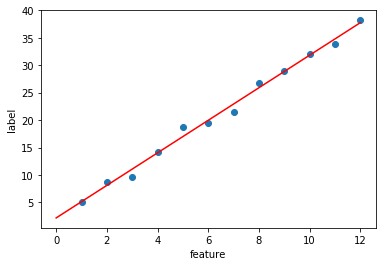

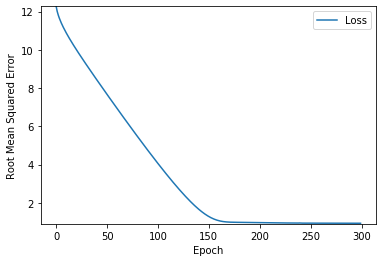

In [8]:
learning_rate = 0.01
epochs = 300
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/500
12/12 [==============================] - 1s 47ms/sample - loss: 345.2855 - root_mean_squared_error: 18.5819
Epoch 2/500
12/12 [==============================] - 0s 793us/sample - loss: 6720104.0000 - root_mean_squared_error: 2592.3164
Epoch 3/500
12/12 [==============================] - 0s 1ms/sample - loss: 343.0522 - root_mean_squared_error: 18.5217
Epoch 4/500
12/12 [==============================] - 0s 1ms/sample - loss: 2.1738 - root_mean_squared_error: 1.4744
Epoch 5/500
12/12 [==============================] - 0s 2ms/sample - loss: 0.8944 - root_mean_squared_error: 0.9457
Epoch 6/500
12/12 [==============================] - 0s 752us/sample - loss: 0.8766 - root_mean_squared_error: 0.9362
Epoch 7/500
12/12 [==============================] - 0s 2ms/sample - loss: 0.8759 - root_mean_squared_error: 0.9359
Epoch 8/500
12/12 [==============================] - 0s 992us/sample - loss: 0.8759 - root_mean_squared_error: 0.9359
Epoch 9/500
12/12 [===========

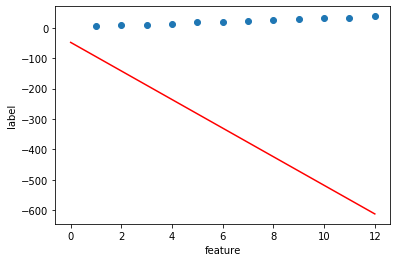

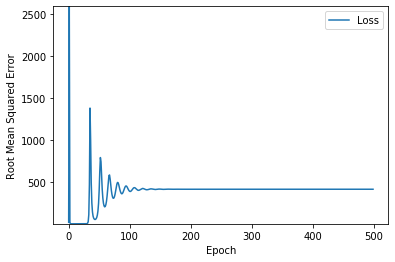

In [9]:
learning_rate = 100
epochs = 500
#my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/50
12/12 [==============================] - 1s 52ms/sample - loss: 380.8805 - root_mean_squared_error: 19.5162
Epoch 2/50
12/12 [==============================] - 0s 2ms/sample - loss: 12333.0234 - root_mean_squared_error: 111.0541
Epoch 3/50
12/12 [==============================] - 0s 2ms/sample - loss: 314.8882 - root_mean_squared_error: 17.7451
Epoch 4/50
12/12 [==============================] - 0s 1ms/sample - loss: 14.1823 - root_mean_squared_error: 3.7659
Epoch 5/50
12/12 [==============================] - 0s 1ms/sample - loss: 1.8526 - root_mean_squared_error: 1.3611
Epoch 6/50
12/12 [==============================] - 0s 1ms/sample - loss: 0.9924 - root_mean_squared_error: 0.9962
Epoch 7/50
12/12 [==============================] - 0s 1ms/sample - loss: 0.8994 - root_mean_squared_error: 0.9483
Epoch 8/50
12/12 [==============================] - 0s 1ms/sample - loss: 0.8846 - root_mean_squared_error: 0.9405
Epoch 9/50
12/12 [============================

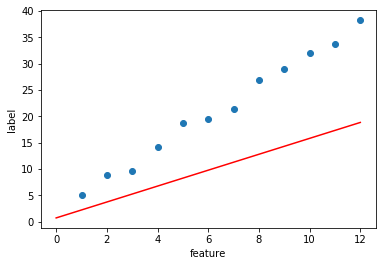

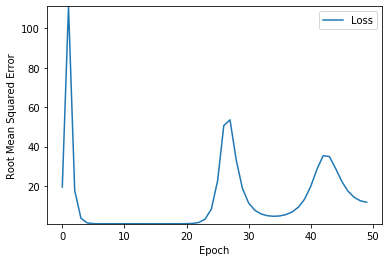

In [10]:
learning_rate = 5
epochs = 50
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/50
12/12 [==============================] - 1s 50ms/sample - loss: 422.8656 - root_mean_squared_error: 20.5637
Epoch 2/50
12/12 [==============================] - 0s 2ms/sample - loss: 1004.2390 - root_mean_squared_error: 31.6897
Epoch 3/50
12/12 [==============================] - 0s 2ms/sample - loss: 164.7075 - root_mean_squared_error: 12.8338
Epoch 4/50
12/12 [==============================] - 0s 2ms/sample - loss: 25.9752 - root_mean_squared_error: 5.0966
Epoch 5/50
12/12 [==============================] - 0s 1ms/sample - loss: 6.0223 - root_mean_squared_error: 2.4540
Epoch 6/50
12/12 [==============================] - 0s 1ms/sample - loss: 2.3181 - root_mean_squared_error: 1.5225
Epoch 7/50
12/12 [==============================] - 0s 1ms/sample - loss: 1.4189 - root_mean_squared_error: 1.1912
Epoch 8/50
12/12 [==============================] - 0s 1ms/sample - loss: 1.1444 - root_mean_squared_error: 1.0698
Epoch 9/50
12/12 [==============================

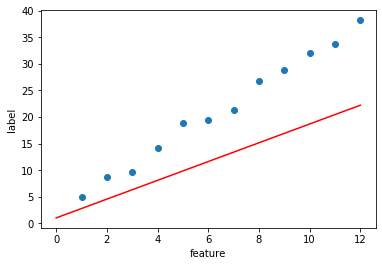

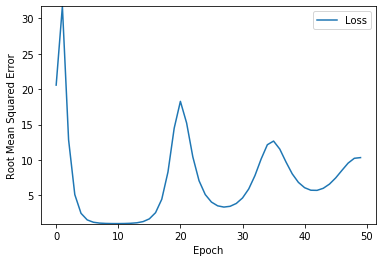

In [11]:
learning_rate = 2
epochs = 50
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/300
12/12 [==============================] - 1s 62ms/sample - loss: 232.0374 - root_mean_squared_error: 15.2328
Epoch 2/300
12/12 [==============================] - 0s 641us/sample - loss: 60459.9648 - root_mean_squared_error: 245.8861
Epoch 3/300
12/12 [==============================] - 0s 877us/sample - loss: 218.6156 - root_mean_squared_error: 14.7857
Epoch 4/300
12/12 [==============================] - 0s 1ms/sample - loss: 3.7845 - root_mean_squared_error: 1.9454
Epoch 5/300
12/12 [==============================] - 0s 1ms/sample - loss: 0.9862 - root_mean_squared_error: 0.9931
Epoch 6/300
12/12 [==============================] - 0s 1ms/sample - loss: 0.9011 - root_mean_squared_error: 0.9492
Epoch 7/300
12/12 [==============================] - 0s 1ms/sample - loss: 0.8951 - root_mean_squared_error: 0.9461
Epoch 8/300
12/12 [==============================] - 0s 1ms/sample - loss: 0.8933 - root_mean_squared_error: 0.9451
Epoch 9/300
12/12 [================

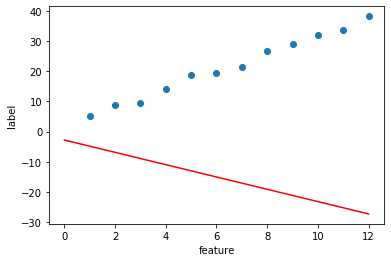

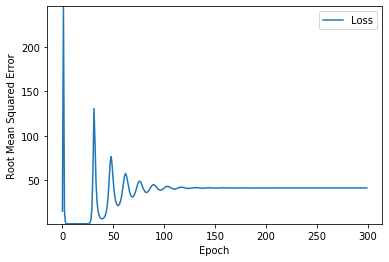

In [12]:
learning_rate = 10
epochs = 300
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/200
12/12 [==============================] - 1s 48ms/sample - loss: 801.5298 - root_mean_squared_error: 28.3113
Epoch 2/200
12/12 [==============================] - 0s 678us/sample - loss: 5.9748 - root_mean_squared_error: 2.4443
Epoch 3/200
12/12 [==============================] - 0s 1ms/sample - loss: 1.2064 - root_mean_squared_error: 1.0983
Epoch 4/200
12/12 [==============================] - 0s 786us/sample - loss: 1.1846 - root_mean_squared_error: 1.0884
Epoch 5/200
12/12 [==============================] - 0s 1ms/sample - loss: 1.1672 - root_mean_squared_error: 1.0804
Epoch 6/200
12/12 [==============================] - 0s 1ms/sample - loss: 1.1499 - root_mean_squared_error: 1.0723
Epoch 7/200
12/12 [==============================] - 0s 1ms/sample - loss: 1.1328 - root_mean_squared_error: 1.0643
Epoch 8/200
12/12 [==============================] - 0s 970us/sample - loss: 1.1159 - root_mean_squared_error: 1.0564
Epoch 9/200
12/12 [=======================

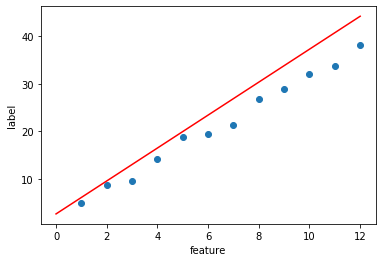

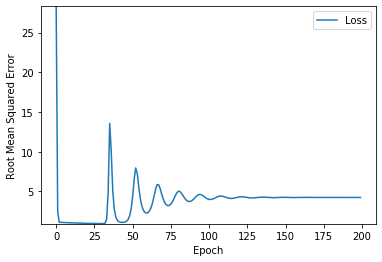

In [13]:
learning_rate = 1
epochs = 200
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/20
12/12 [==============================] - 1s 54ms/sample - loss: 617.2853 - root_mean_squared_error: 24.8452
Epoch 2/20
12/12 [==============================] - 0s 3ms/sample - loss: 2.6750 - root_mean_squared_error: 1.6355
Epoch 3/20
12/12 [==============================] - 0s 3ms/sample - loss: 1.0357 - root_mean_squared_error: 1.0177
Epoch 4/20
12/12 [==============================] - 0s 2ms/sample - loss: 1.0088 - root_mean_squared_error: 1.0044
Epoch 5/20
12/12 [==============================] - 0s 4ms/sample - loss: 0.9998 - root_mean_squared_error: 0.9999
Epoch 6/20
12/12 [==============================] - 0s 4ms/sample - loss: 0.9914 - root_mean_squared_error: 0.9957
Epoch 7/20
12/12 [==============================] - 0s 3ms/sample - loss: 0.9832 - root_mean_squared_error: 0.9915
Epoch 8/20
12/12 [==============================] - 0s 2ms/sample - loss: 0.9751 - root_mean_squared_error: 0.9875
Epoch 9/20
12/12 [==============================] - 0s 3

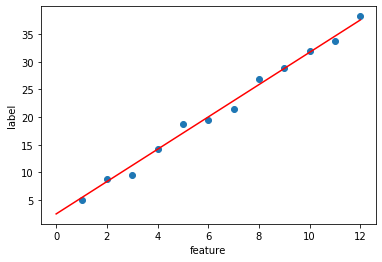

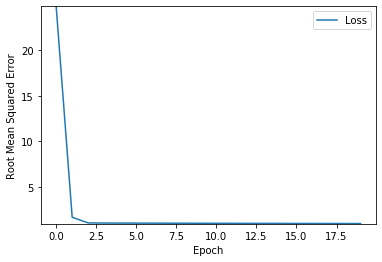

In [14]:
learning_rate = 1
epochs = 20
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/10
12/12 [==============================] - 1s 49ms/sample - loss: 1231.0328 - root_mean_squared_error: 35.0861
Epoch 2/10
12/12 [==============================] - 0s 1ms/sample - loss: 81.9454 - root_mean_squared_error: 9.0524
Epoch 3/10
12/12 [==============================] - 0s 1ms/sample - loss: 6.4861 - root_mean_squared_error: 2.5468
Epoch 4/10
12/12 [==============================] - 0s 1ms/sample - loss: 1.9494 - root_mean_squared_error: 1.3962
Epoch 5/10
12/12 [==============================] - 0s 1ms/sample - loss: 1.7226 - root_mean_squared_error: 1.3125
Epoch 6/10
12/12 [==============================] - 0s 1ms/sample - loss: 1.6785 - root_mean_squared_error: 1.2956
Epoch 7/10
12/12 [==============================] - 0s 1ms/sample - loss: 1.6391 - root_mean_squared_error: 1.2803
Epoch 8/10
12/12 [==============================] - 0s 2ms/sample - loss: 1.5997 - root_mean_squared_error: 1.2648
Epoch 9/10
12/12 [==============================] - 0s

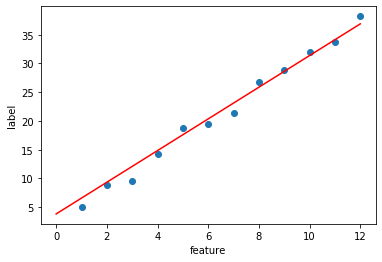

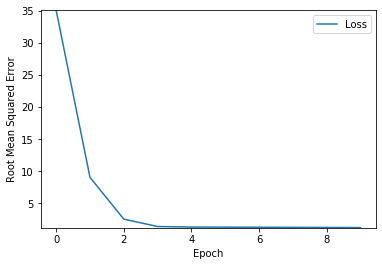

In [15]:
learning_rate = 1
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/15
12/12 [==============================] - 1s 65ms/sample - loss: 1082.2961 - root_mean_squared_error: 32.8983
Epoch 2/15
12/12 [==============================] - 0s 2ms/sample - loss: 47.3610 - root_mean_squared_error: 6.8819
Epoch 3/15
12/12 [==============================] - 0s 1ms/sample - loss: 3.0828 - root_mean_squared_error: 1.7558
Epoch 4/15
12/12 [==============================] - 0s 1ms/sample - loss: 1.5672 - root_mean_squared_error: 1.2519
Epoch 5/15
12/12 [==============================] - 0s 1ms/sample - loss: 1.5070 - root_mean_squared_error: 1.2276
Epoch 6/15
12/12 [==============================] - 0s 1ms/sample - loss: 1.4751 - root_mean_squared_error: 1.2145
Epoch 7/15
12/12 [==============================] - 0s 934us/sample - loss: 1.4434 - root_mean_squared_error: 1.2014
Epoch 8/15
12/12 [==============================] - 0s 2ms/sample - loss: 1.4118 - root_mean_squared_error: 1.1882
Epoch 9/15
12/12 [==============================] - 

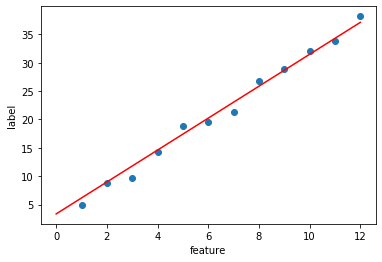

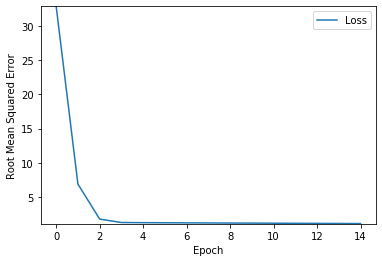

In [16]:
learning_rate = 1
epochs = 15
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/20
12/12 [==============================] - 1s 58ms/sample - loss: 288.8825 - root_mean_squared_error: 16.9965
Epoch 2/20
12/12 [==============================] - 0s 742us/sample - loss: 84.3828 - root_mean_squared_error: 9.1860
Epoch 3/20
12/12 [==============================] - 0s 1ms/sample - loss: 14.9387 - root_mean_squared_error: 3.8651
Epoch 4/20
12/12 [==============================] - 0s 1ms/sample - loss: 3.7743 - root_mean_squared_error: 1.9428
Epoch 5/20
12/12 [==============================] - 0s 1ms/sample - loss: 1.6758 - root_mean_squared_error: 1.2945
Epoch 6/20
12/12 [==============================] - 0s 1ms/sample - loss: 1.1697 - root_mean_squared_error: 1.0815
Epoch 7/20
12/12 [==============================] - 0s 1ms/sample - loss: 1.0167 - root_mean_squared_error: 1.0083
Epoch 8/20
12/12 [==============================] - 0s 1ms/sample - loss: 0.9623 - root_mean_squared_error: 0.9810
Epoch 9/20
12/12 [==============================] - 

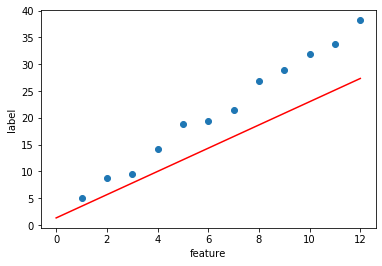

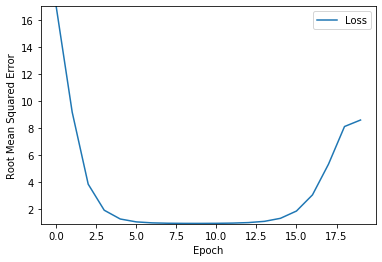

In [17]:
learning_rate = 1
epochs = 20
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/12
12/12 [==============================] - 1s 51ms/sample - loss: 893.1036 - root_mean_squared_error: 29.8848
Epoch 2/12
12/12 [==============================] - 0s 2ms/sample - loss: 15.4219 - root_mean_squared_error: 3.9271
Epoch 3/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.4173 - root_mean_squared_error: 1.1905
Epoch 4/12
12/12 [==============================] - 0s 2ms/sample - loss: 1.2904 - root_mean_squared_error: 1.1359
Epoch 5/12
12/12 [==============================] - 0s 981us/sample - loss: 1.2682 - root_mean_squared_error: 1.1262
Epoch 6/12
12/12 [==============================] - 0s 2ms/sample - loss: 1.2463 - root_mean_squared_error: 1.1164
Epoch 7/12
12/12 [==============================] - 0s 3ms/sample - loss: 1.2245 - root_mean_squared_error: 1.1066
Epoch 8/12
12/12 [==============================] - 0s 3ms/sample - loss: 1.2028 - root_mean_squared_error: 1.0967
Epoch 9/12
12/12 [==============================] - 0

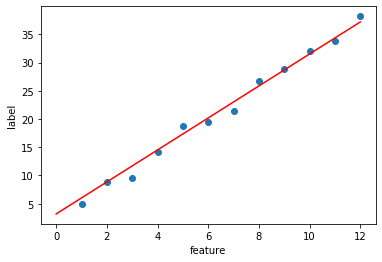

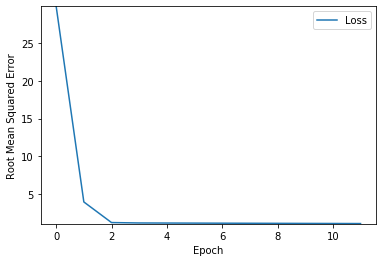

In [18]:
learning_rate = 1
epochs = 12
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/20
12/12 [==============================] - 1s 51ms/sample - loss: 420.0891 - root_mean_squared_error: 20.4961
Epoch 2/20
12/12 [==============================] - 0s 1ms/sample - loss: 32.6426 - root_mean_squared_error: 5.7134
Epoch 3/20
12/12 [==============================] - 0s 2ms/sample - loss: 3.5811 - root_mean_squared_error: 1.8924
Epoch 4/20
12/12 [==============================] - 0s 3ms/sample - loss: 1.2325 - root_mean_squared_error: 1.1102
Epoch 5/20
12/12 [==============================] - 0s 1ms/sample - loss: 0.9534 - root_mean_squared_error: 0.9764
Epoch 6/20
12/12 [==============================] - 0s 1ms/sample - loss: 0.9056 - root_mean_squared_error: 0.9517
Epoch 7/20
12/12 [==============================] - 0s 2ms/sample - loss: 0.8940 - root_mean_squared_error: 0.9455
Epoch 8/20
12/12 [==============================] - 0s 1ms/sample - loss: 0.8898 - root_mean_squared_error: 0.9433
Epoch 9/20
12/12 [==============================] - 0s 

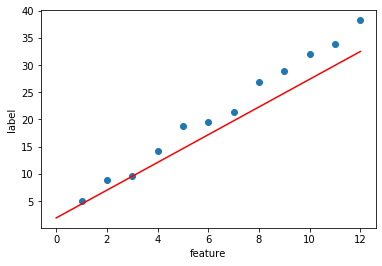

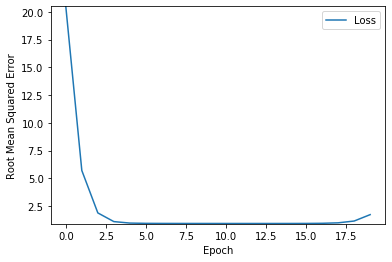

In [19]:
learning_rate = 1
epochs = 20
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


Train on 12 samples
Epoch 1/12
12/12 [==============================] - 1s 63ms/sample - loss: 372.5976 - root_mean_squared_error: 19.3028
Epoch 2/12
12/12 [==============================] - 0s 1ms/sample - loss: 47.5126 - root_mean_squared_error: 6.8929
Epoch 3/12
12/12 [==============================] - 0s 1ms/sample - loss: 6.1848 - root_mean_squared_error: 2.4869
Epoch 4/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.7235 - root_mean_squared_error: 1.3128
Epoch 5/12
12/12 [==============================] - 0s 947us/sample - loss: 1.0677 - root_mean_squared_error: 1.0333
Epoch 6/12
12/12 [==============================] - 0s 1ms/sample - loss: 0.9363 - root_mean_squared_error: 0.9676
Epoch 7/12
12/12 [==============================] - 0s 1ms/sample - loss: 0.9018 - root_mean_squared_error: 0.9496
Epoch 8/12
12/12 [==============================] - 0s 1ms/sample - loss: 0.8905 - root_mean_squared_error: 0.9436
Epoch 9/12
12/12 [==============================] - 0

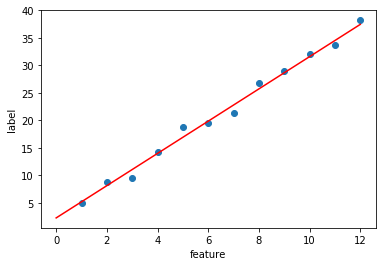

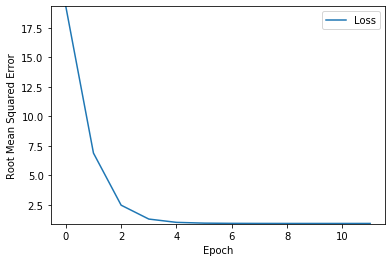

In [20]:
learning_rate = 1
epochs = 12
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


Train on 12 samples
Epoch 1/12
12/12 [==============================] - 1s 48ms/sample - loss: 708.2448 - root_mean_squared_error: 26.6129
Epoch 2/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.3475 - root_mean_squared_error: 1.1608
Epoch 3/12
12/12 [==============================] - 0s 2ms/sample - loss: 1.1017 - root_mean_squared_error: 1.0496
Epoch 4/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.0886 - root_mean_squared_error: 1.0434
Epoch 5/12
12/12 [==============================] - 0s 2ms/sample - loss: 1.0758 - root_mean_squared_error: 1.0372
Epoch 6/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.0632 - root_mean_squared_error: 1.0311
Epoch 7/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.0507 - root_mean_squared_error: 1.0251
Epoch 8/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.0385 - root_mean_squared_error: 1.0191
Epoch 9/12
12/12 [==============================] - 0s 1

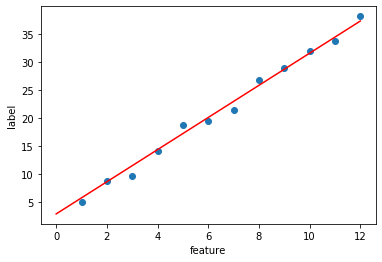

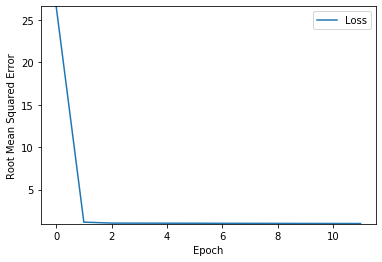

In [21]:
learning_rate = 1
epochs = 12
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


Train on 12 samples
Epoch 1/70
12/12 [==============================] - 1s 47ms/sample - loss: 820.3625 - root_mean_squared_error: 28.6420
Epoch 2/70
12/12 [==============================] - 0s 2ms/sample - loss: 624.4959 - root_mean_squared_error: 24.9899
Epoch 3/70
12/12 [==============================] - 0s 1ms/sample - loss: 507.0884 - root_mean_squared_error: 22.5186
Epoch 4/70
12/12 [==============================] - 0s 1ms/sample - loss: 422.0932 - root_mean_squared_error: 20.5449
Epoch 5/70
12/12 [==============================] - 0s 1ms/sample - loss: 355.7603 - root_mean_squared_error: 18.8616
Epoch 6/70
12/12 [==============================] - 0s 2ms/sample - loss: 301.8863 - root_mean_squared_error: 17.3749
Epoch 7/70
12/12 [==============================] - 0s 1ms/sample - loss: 257.0677 - root_mean_squared_error: 16.0333
Epoch 8/70
12/12 [==============================] - 0s 2ms/sample - loss: 219.2042 - root_mean_squared_error: 14.8055
Epoch 9/70
12/12 [=================

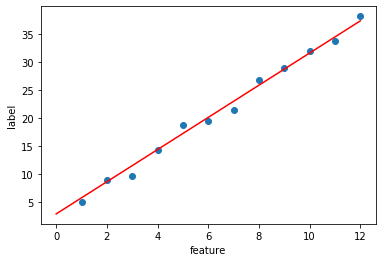

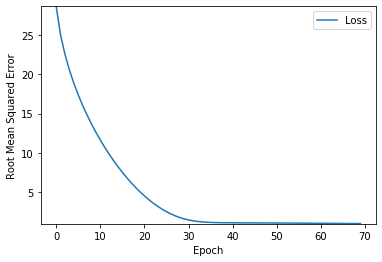

In [22]:
learning_rate = 0.14
epochs = 70
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/12
12/12 [==============================] - 1s 47ms/sample - loss: 675.4429 - root_mean_squared_error: 25.9893
Epoch 2/12
12/12 [==============================] - 0s 742us/sample - loss: 1.1003 - root_mean_squared_error: 1.0490
Epoch 3/12
12/12 [==============================] - 0s 838us/sample - loss: 1.0693 - root_mean_squared_error: 1.0341
Epoch 4/12
12/12 [==============================] - 0s 2ms/sample - loss: 1.0580 - root_mean_squared_error: 1.0286
Epoch 5/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.0468 - root_mean_squared_error: 1.0231
Epoch 6/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.0358 - root_mean_squared_error: 1.0177
Epoch 7/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.0249 - root_mean_squared_error: 1.0124
Epoch 8/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.0142 - root_mean_squared_error: 1.0071
Epoch 9/12
12/12 [==============================] - 

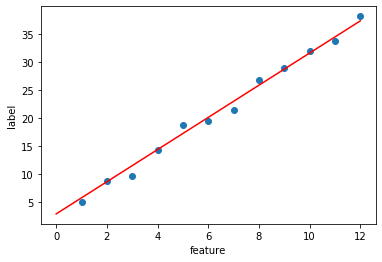

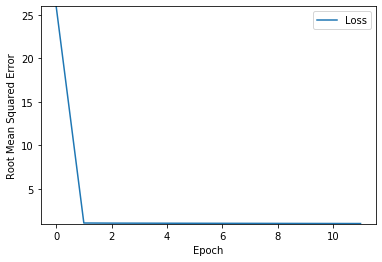

In [23]:
learning_rate = 1
epochs = 12
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/100
12/12 [==============================] - 1s 81ms/sample - loss: 863.4397 - root_mean_squared_error: 29.3843
Epoch 2/100
12/12 [==============================] - 0s 938us/sample - loss: 788.4825 - root_mean_squared_error: 28.0799
Epoch 3/100
12/12 [==============================] - 0s 1ms/sample - loss: 737.3568 - root_mean_squared_error: 27.1543
Epoch 4/100
12/12 [==============================] - 0s 1ms/sample - loss: 696.4274 - root_mean_squared_error: 26.3899
Epoch 5/100
12/12 [==============================] - 0s 1ms/sample - loss: 661.4468 - root_mean_squared_error: 25.7186
Epoch 6/100
12/12 [==============================] - 0s 1ms/sample - loss: 630.4633 - root_mean_squared_error: 25.1090
Epoch 7/100
12/12 [==============================] - 0s 1ms/sample - loss: 602.3959 - root_mean_squared_error: 24.5438
Epoch 8/100
12/12 [==============================] - 0s 1ms/sample - loss: 576.5761 - root_mean_squared_error: 24.0120
Epoch 9/100
12/12 [======

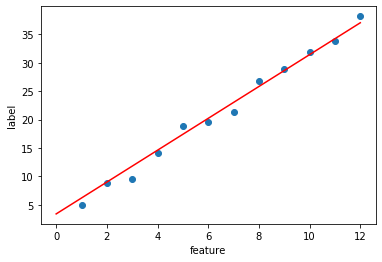

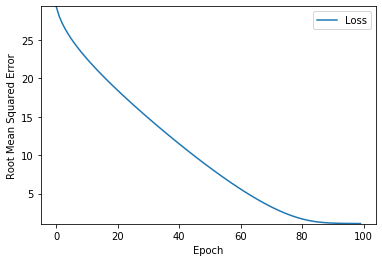

In [24]:
learning_rate = 0.05
epochs = 100
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/100
12/12 [==============================] - 1s 49ms/sample - loss: 260.2733 - root_mean_squared_error: 16.1330
Epoch 2/100
12/12 [==============================] - 0s 1ms/sample - loss: 219.9281 - root_mean_squared_error: 14.8300
Epoch 3/100
12/12 [==============================] - 0s 2ms/sample - loss: 193.8682 - root_mean_squared_error: 13.9237
Epoch 4/100
12/12 [==============================] - 0s 2ms/sample - loss: 173.8503 - root_mean_squared_error: 13.1852
Epoch 5/100
12/12 [==============================] - 0s 1ms/sample - loss: 157.3535 - root_mean_squared_error: 12.5441
Epoch 6/100
12/12 [==============================] - 0s 1ms/sample - loss: 143.2291 - root_mean_squared_error: 11.9678
Epoch 7/100
12/12 [==============================] - 0s 1ms/sample - loss: 130.8442 - root_mean_squared_error: 11.4387
Epoch 8/100
12/12 [==============================] - 0s 821us/sample - loss: 119.8083 - root_mean_squared_error: 10.9457
Epoch 9/100
12/12 [======

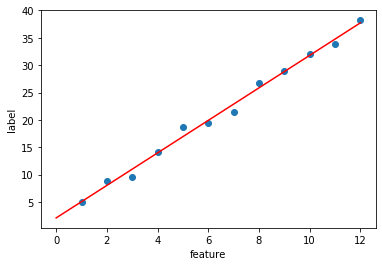

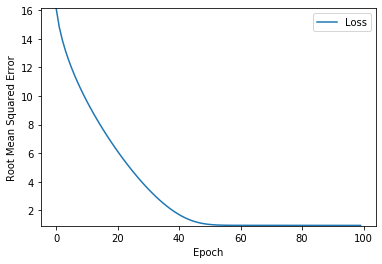

In [25]:
learning_rate = 0.05
epochs = 100
my_batch_size = 1

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)